# ME460 Linkages - Prof. Mark Ganter
# 4 position path generator via dyad-standard and characteristic equations

LEFT DYAD EQ.s
posl2= d1*(-1 + exp(2.05076187109334*I))*exp(I*t1) + d2*(exp(I*g2) - 1)*exp(I*t2) + 1 - 1.74*exp(-0.509636141582344*I)
posl3= d1*(-1 + exp(2.96705972839036*I))*exp(I*t1) + d2*(exp(I*g3) - 1)*exp(I*t2) - 0.74
posl4= d1*(-1 + exp(3.97935069454707*I))*exp(I*t1) + d2*(exp(I*g4) - 1)*exp(I*t2) + 1 - 1.74*exp(0.452040276266531*I)

left char solution g3 & g4 -29.091556808333472 -19.114080680623836
abs(left_char)= 0.0451802397921887

augmented left dyad solution: r1,t1,r2,t2 = 0.877416201421215 199.14315719071237 2.08304849719367 -51.359826592482804
abs(pos3a)= 2.45e-6
abs(pos4a)= 2.49e-6

right char solution s3 & s4 68.79863838422527 92.3196424543096
abs(right_char)= 1.63912470899254e-10

RIGHT DYAD EQ.s
posr2= d3*(-1 + exp(0.349065850398866*I))*exp(I*t3) + d4*(-1 + exp(-0.523598775598299*I))*exp(I*t4) + 1 - 1.74*exp(-0.509636141582344*I)
posr3= d3*(-1 + exp(1.20076276069368*I))*exp(I*t3) + d4*(-1 + exp(-0.507743450836392*I))*exp(I*t4) - 0.74
posr4= d3*(-1 + exp(1.6112817250916

<IPython.core.display.Javascript object>


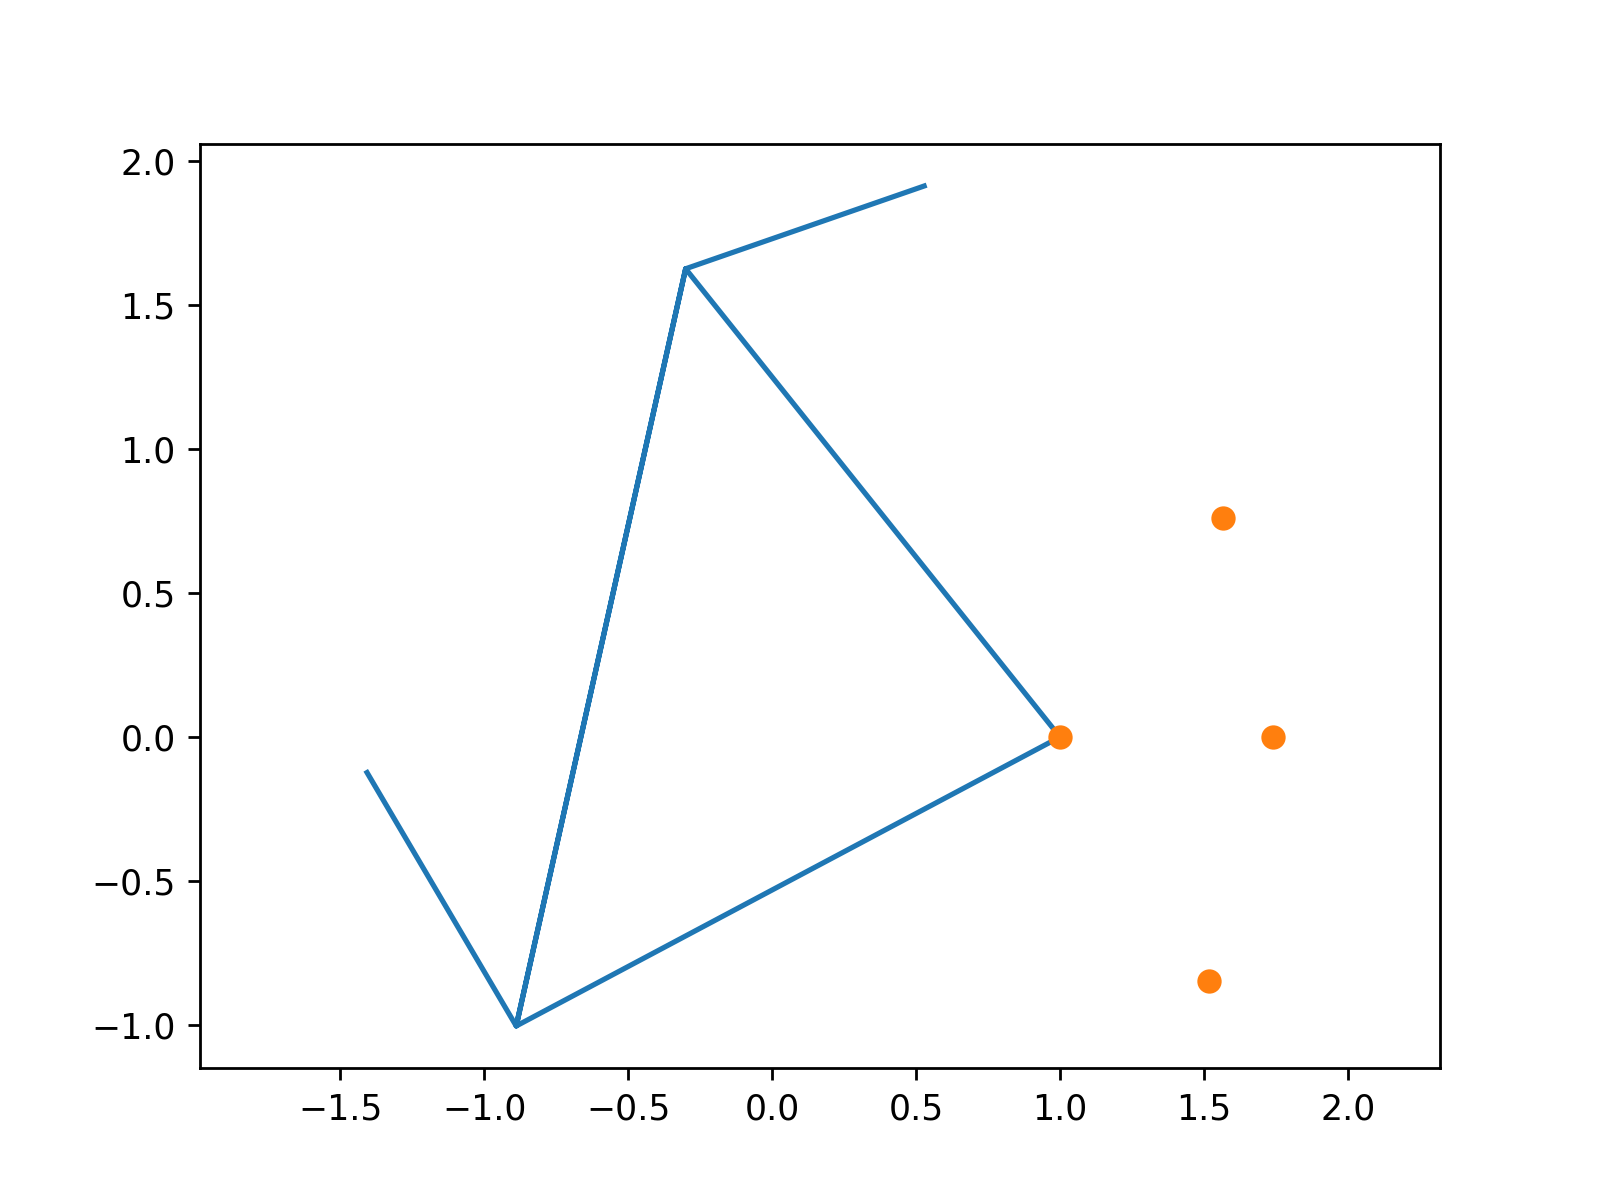

In [1]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *

import matplotlib
import matplotlib.pyplot as plt

# 4 precision coupler points
c1 = 1*exp(I*0)
c2 = 1.74*exp(I*radians(-29.2))
c3 = 1.74*exp(I*0)
c4 = 1.74*exp(I*radians(25.9))


d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
g2,g3,g4 = symbols("g2 g3 g4", real=True)
s2,s3,s4 = symbols("s2 s3 s4",real=True)

r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

del2 = c2-c1
del3 = c3-c1
del4 = c4-c1

p2 = radians(117.5)
p3 = radians(170)
p4 = radians(228)

# LEFT SIDE #
#write out the dyad-standard equations for left side of linkage 
# posl1 = r1+r2 - c1
posl2 = r1*(exp(I*p2)-1) + r2*(exp(I*g2)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r2*(exp(I*g3)-1) - del3
posl4 = r1*(exp(I*p4)-1) + r2*(exp(I*g4)-1) - del4

print("LEFT DYAD EQ.s")
print("posl2=",posl2)
print("posl3=",posl3)
print("posl4=",posl4)
print()

# try 3 position solution first
# substitute values for g2 & g3
#pos2a = posl2.subs(g2,radians(-30))
#pos3a = posl3.subs(g3,radians(-29.8))
#print("pos2a=",pos2a)
#print("pos3a=",pos3a)
#print()

'''
ans = nsolve((re(pos2a),im(pos2a),re(pos3a),im(pos3a)), (d1, t1, d2, t2), (1,radians(200),2 ,radians(-50)), 
            maxsteps=100, tol=0.01, verify=true, solver='bisect')

print("left 3pos solution r1,t1,r2,t2",ans[0],degrees(ans[1]),ans[2],degrees(ans[3]))
print ("abs(pos2a)=",N(abs(pos2a.evalf(subs={d1:ans[0],t1:ans[1],d2:ans[2],t2:ans[3]}) ),3))
print ("abs(pos3a)=",N(abs(pos3a.evalf(subs={d1:ans[0],t1:ans[1],d2:ans[2],t2:ans[3]}) ),3))
print()



# next try 4 position solution
pos2a = posl2.subs(g2,radians(-30))

ans = nsolve((re(pos2a),im(pos2a),re(posl3),im(posl3),re(posl4),im(posl4)), (d1, t1, d2, t2, g3, g4), 
             (1,radians(160),1 ,radians(-20),radians(-29.8),radians(-19.8)), 
            maxsteps=100, tol=0.02, verify=true,solver="halley")

print("left 4pos solution",ans[0],degrees(ans[1]),ans[2],degrees(ans[3]),degrees(ans[4]),degrees(ans[5]))
print ("abs(pos2a)=",N(abs(pos2a.evalf(subs={d1:ans[0],t1:ans[1],d2:ans[2],t2:ans[3],g3:ans[4],g4:ans[5]}) ),3))
print ("abs(posl3)=",N(abs(posl3.evalf(subs={d1:ans[0],t1:ans[1],d2:ans[2],t2:ans[3],g3:ans[4],g4:ans[5]}) ),3))
print ("abs(posl4)=",N(abs(posl4.evalf(subs={d1:ans[0],t1:ans[1],d2:ans[2],t2:ans[3],g3:ans[4],g4:ans[5]}) ),3))
print()

print()

'''
# now try characteristic polynomial approach

leftside = Matrix([[(exp(I*p2)-1),(exp(I*g2)-1),del2],[(exp(I*p3)-1),(exp(I*g3)-1),del3],[(exp(I*p4)-1),(exp(I*g4)-1),del4]])
detleft = leftside.det()
detlefta = detleft.subs(g2,radians(-30))
#print("detlefta=",detlefta)

#next solve left characteristic equation for g3 and g4
ans = nsolve((re(detlefta),im(detlefta)), (g3, g4), (radians(-7),radians(10)), 
            maxsteps=200, tol=1.0e-6, verify=false)  #, verbose=true )

print("left char solution g3 & g4",degrees(ans[0]),degrees(ans[1]))
print ("abs(left_char)=",abs(detlefta.evalf(subs={g3:ans[0],g4:ans[1]}) ))
print()

# now plug in results from left characteristic equation into pos. 3 & pos. 4 dyad equation and solve
pos2a = posl2.subs(g2,radians(-30))
pos3a = posl3.subs(g3,ans[0])
pos4a = posl4.subs(g4,ans[1])

# set g's before information is overwritten
g2a = radians(-30)
g3a = ans[0]
g4a = ans[1]
#g3a = radians(-27.7)
#g4a = radians(-17.7)

#print("pos3a=",pos3a)
#print("pos4a=",pos4a)
#print()
ansl = nsolve((re(pos3a),im(pos3a),re(pos4a),im(pos4a)), (d1, t1, d2, t2), (1,radians(200),2 ,radians(-50)), 
            maxsteps=100, tol=1.0e-6, verify=false)

print("augmented left dyad solution: r1,t1,r2,t2 =",ansl[0],degrees(ansl[1]),ansl[2],degrees(ansl[3]))
print ("abs(pos3a)=",N(abs(pos3a.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print ("abs(pos4a)=",N(abs(pos4a.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print()

# solve the right side using information from left solutions (g3 & g4 from char. eq.)

# right characteristic equation
rightside = Matrix([[(exp(I*s2)-1),(exp(I*g2a)-1),del2],[(exp(I*s3)-1),(exp(I*g3a)-1),del3],[(exp(I*s4)-1),(exp(I*g4a)-1),del4]])
#pprint(N(rightside))
detright = rightside.det()
# s2 is a choice (or given in design specs)
detrighta = detright.subs(s2,radians(20))

#next solve right characteristic equation for s3 and s4
ansr = nsolve((re(detrighta),im(detrighta)), (s3, s4), (radians(30),radians(40)), 
            maxsteps=200, tol=1.0e-6, verify=false )  #, verbose=true )

s2b = radians(20)
s3b = ansr[0]
s4b = ansr[1]

print("right char solution s3 & s4",degrees(ansr[0]),degrees(ansr[1]))
print ("abs(right_char)=",abs(detrighta.evalf(subs={s3:s3b,s4:s4b}) ))
print()

#write out the dyad-standard equations for right side of linkage 
posr2 = r3*(exp(I*s2b)-1) + r4*(exp(I*g2a)-1) - del2
posr3 = r3*(exp(I*s3b)-1) + r4*(exp(I*g3a)-1) - del3
posr4 = r3*(exp(I*s4b)-1) + r4*(exp(I*g4a)-1) - del4

print("RIGHT DYAD EQ.s")
print("posr2=",posr2)
print("posr3=",posr3)
print("posr4=",posr4)
print()

# now plug in results from left characteristic equation into pos. 3 & pos. 4 dyad equation and solve
#pos3b = posr3.subs(s3,s3b)
#pos4b = posr4.subs(s4,s4b)

ansr = nsolve((re(posr3),im(posr3),re(posr4),im(posr4)), (d3, t3, d4, t4), (1.0,radians(120), 2.0 ,radians(50)), 
            maxsteps=200, tol=1.0e-6, verify=false)

print("right augmented dyad solution r3,t3,r4,t4 =",ansr[0],degrees(ansr[1]),ansr[2],degrees(ansr[3]))
print ("abs(pos3)=",N(abs(posr3.evalf(subs={d3:ansr[0],t3:ansr[1],d4:ansr[2],t4:ansr[3]}) ),3))
print ("abs(pos4)=",N(abs(posr4.evalf(subs={d3:ansr[0],t3:ansr[1],d4:ansr[2],t4:ansr[3]}) ),3))
print()

'''
# three position solution for right side
pos2b = posr2.subs(s2,s2b)
ans = nsolve((re(pos2b),im(pos2b),re(pos3b),im(pos3b)), (d3, t3, d4, t4), (1,radians(100), 2 ,radians(50)), 
             maxsteps=100, tol=0.02, verify=true, solver="halley")

print("right 3pos solution r3,t3,r4,t4",ans[0],degrees(ans[1]),ans[2],degrees(ans[3]))
print ("abs(pos2b)=",N(abs(pos2b.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3]}) ),3))
print ("abs(pos3b)=",N(abs(pos3b.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3]}) ),3))
print()

# next try 4 position solution

ans = nsolve((re(pos2b),im(pos2b),re(posr3),im(posr3),re(posr4),im(posr4)), (d3, t3, d4, t4, s3, s4), 
             (11,radians(160),5 ,radians(-20),radians(15),radians(6.5)), 
            maxsteps=100, tol=0.02, verify=true,solver="halley")

print("right 4pos solution",ans[0],degrees(ans[1]),ans[2],degrees(ans[3]),degrees(ans[4]),degrees(ans[5]))
print ("abs(pos2a)=",N(abs(pos2b.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3],s3:ans[4],s4:ans[5]}) ),3))
print ("abs(posl3)=",N(abs(posr3.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3],s3:ans[4],s4:ans[5]}) ),3))
print ("abs(posl4)=",N(abs(posr4.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3],s3:ans[4],s4:ans[5]}) ),3))
print()
'''
print()
evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
evalr2 = N(r2.evalf(subs={d2:ansl[2],t2:ansl[3]}),3)
evalr3 = N(r3.evalf(subs={d3:ansr[0],t3:ansr[1]}),3)
evalr4 = N(r4.evalf(subs={d4:ansr[2],t4:ansr[3]}),3)
evalr5 = evalr2-evalr4
evalr6 = evalr1+evalr2-evalr4-evalr3

print("phi2 =",degrees(p2),"phi3 =",degrees(p3),"phi4 =",degrees(p4))
print("psi2 =",degrees(s2b),"psi3 =",degrees(s3b),"psi4 =",degrees(s4b))
print("gamma2 =",degrees(g2a),"gamma3 =",degrees(g3a),"gamma4 =",degrees(g4a))
print("del2 =",N(del2.evalf(),3))
print("del3 =",N(del3.evalf(),3))
print("del4 =",N(del4.evalf(),3))
print()

print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R2 = (",evalr2,")  (", abs(evalr2),"@",degrees(arg(evalr2)),"degs)")
print("R2 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R4 = (",evalr4,")  (", abs(evalr4),"@",degrees(arg(evalr4)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

evalOa = c1-evalr2-evalr1 
evalA = c1-evalr2
evalB = c1-evalr4
evalOb = c1-evalr4-evalr3

print("Oa = (",evalOa,")")
print("A = (",evalA,")")
print("C = (",c1,")")
print("B = (",evalB,")")
print("Ob = (",evalOb,")")

# call matplotlib routines for a scatter plot 
fig, ax = plt.subplots()
ax.plot([re(evalOa),re(evalA),re(c1),re(evalB),re(evalA),re(evalB),re(evalOb)],
    [im(evalOa),im(evalA),im(c1),im(evalB),im(evalA),im(evalB),im(evalOb)],
    [re(c1),re(c2),re(c3),re(c4)],[im(c1),im(c2),im(c3),im(c4)],'o',)
ax.set_aspect('equal',adjustable='datalim')
plt.show()
